# Scenario Creation
This page will explain how to create use scenarioxp to create and manage a scenario.
First, we model a generic scenario. A scenario $S$ is system that is provided input $X$ and results in an output $Y$. Thus a system may be represented formally as:

$$S(X)=Y$$

Where $S()$ is the scenario testing environment, $X$ is the scenario configuration, and $Y$ is a performance metric.  By modeling a scenario in this way, a scenario becomes modular and encapsulated. The controllable parameters are the configuration, and the performance metric allows a scenario to be scored and compared. This flattened perspective of a scenario summarizes a scenario test as a combination of configurations and scores such that:

$$X\rightarrow Y$$

In [1]:
%%capture
import scenarioxp as sxp
import pandas as pd
import matplotlib.pyplot as plt

Let us create a scenario that is a circle with a radius of 2 centered at (0,0). The scenario has two parameters as input, i.e. $x$ and $y$ position. The scenario score is 1 if the $(x,y)$ point is within the circle, otherwise 0.

In [2]:
class CircleScenario(sxp.Scenario):
    def __init__(self, params : pd.Series):
        super().__init__(params)
        point = [params["x"], params["y"]]
        center = [0,0]
        radius = 2
        distance = lambda x1, y1, x2, y2: ((x2 - x1)**2 + (y2 - y1)**2)**0.5
        self._score = pd.Series({"inside" : distance(*center,*point) <= radius})
        return
    
    @property
    def score(self) -> pd.Series:
        return self._score

Then we try 3 points. Within the circle, at the edge, and outside the circle.

In [3]:
p0 = pd.Series({"x" : 1, "y" : 0})
p1 = pd.Series({"x" : 2, "y" : 0})
p2 = pd.Series({"x" : 3, "y" : 0})

cs0 = CircleScenario(p0)
cs1 = CircleScenario(p1)
cs2 = CircleScenario(p2)

Then we plot them based on score.

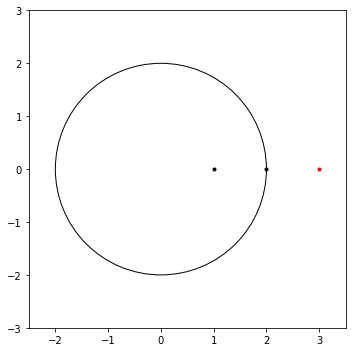

In [4]:
from matplotlib.patches import Circle
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
ax.set_xlim(-2.5,3.5)
ax.set_ylim(-3,3)

circle = Circle( [0,0], 2, edgecolor='black', facecolor='none')
ax.add_patch(circle)

for cs in [cs0, cs1, cs2]:
    x,y = cs.params.to_list()
    color = ["red","black"][int(cs.score["inside"])]
    ax.plot(x,y,color=color, marker = ".")
    continue

plt.tight_layout()